<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# numpy modul

A `numpy` a Python nyelv vektorok és mátrixok kezelésére specializált modulja.

A Python nyelvben a vektorok és mátrixok kezelését a listák segítségével is megoldhatjuk, de az kevésbé hatékony (mivel eltérő Python adattípusok lehetnek ugyanannak a listának az elemei). A numpy további előnye, hogy számos vektorokkal, mátrixokkal kapcsolatos műveletet készen tartalmaz és C nyelven írt kódot tartalmaz, mely jóval hatékonyabb.

Egy példa a mátrix szorzás megvalósítására listák használatával. A mátrixot listák listájaként tároljuk.

Naiv, nem pythonic megoldás:

In [1]:
def naiv_mmul(a, b):
        n = len(a)      # number of rows of result
        m = len(b[0])   # number of columns of result
        k = len(b)
        res = [[0] * m for i in range(n)]   # fill result with zeros
        for i in range(n):
                for j in range(m):
                        s = 0
                        for l in range(k):
                                s += a[i][l] * b[l][j]
                        res[i][j] = s
        return res

Miért kell az eredmény mátrixot feltölteni? Miért nem lenne helyes a `res = [[0] * m] * n` feltöltés?

Próbáljuk ki a naiv eljárást két egyszerű mátrix-szal

In [6]:
c = [[1, 3, 4], [-3, 6, -1]]
d = [[5, 7], [-2, 4], [8, -3]]
print(naiv_mmul(c, d))

[[31, 7], [-35, 6]]


Nézzünk meg egy másik megoldást, mely a Python adta lehetőségeket jobban kihasználja (Pythonic megoldás).

In [5]:
def mmul(a, b):
        return [[sum(i * j for i, j in zip(r, c)) for c in zip(*b)] for r in a]

A fenti függvény három egymásba ágyazott lista feldolgozást tartalmaz. Kezdjük a végéről a `for r in a` az a mátrix sorait állítja elő az `r` változóban. A `for c in zip(*b)` kicsit trükkösebb, ez a `b` mátrix oszlopait állítja elő. A `zip` függvény paraméterlistáján a `b` előtti * karakter azt eredményezi, hogy a függvény b lista elemeit kapja meg (azaz a b sorait). A `zip` függvény a paraméterként megkapott listákból olyan listát állít elő, melynek elemei az eredeti listák azonos indexű elemeit tartalmazói egyszerű listákból (tuple) állnak. Az így előállítot sorok és oszlop vektorok skaláris szorzatát a sum függvény állítja elő a harmadik ciklussal.

Számoljuk ki az előző példát!

In [7]:
mmul(c, d)

[[31, 7], [-35, 6]]

## numpy tömbök létrehozása

A numpy tömbökben az elemek csak azonos típusúak lehetnek, jellemzően egész, lebegőpontos és logikai típusú elemeket használunk. Numpy tömböket létrehozhatunk speciális numpy függvényekkel vagy listákból.

In [9]:
import numpy as np
a = np.zeros(9).reshape(3, 3)           # 3 x 3 nullákat tartalmazó mátrix
a = np.zeros((3, 3))                    # ugyanaz mint az előző sor
print(a)
print(a.dtype)                          # a mátrix elemeinek típusa
b = np.random.rand(6)                   # 6 elemű véletlen vektor
print(b)
i = np.eye(4)                           # 4 x 4 egységmátrix
print(i)
# mátrix létrehozása listából adott elemtípussal
c = np.array([[1, 2, 3], [2, 4, 6]], dtype=np.int32)
print(c)
print(c.shape)                          # tömböknek tulajdonságai is vannak
print(c.size)
d = np.arange(10)                       # 0..9 elemekből álló vektor
                                        # np.array(range(10)) is lehetne
print(d)
e = np.arange(2, 11, 2)                 # páros számok 10-ig
print(e)
f = np.arange(0.1, 1, 0.1)              # nem csak egész értékeke lehetnek
f = np.linspace(0.1, 0.9, 9)            # ugyanaz mint az előző
print(f)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
float64
[0.69554964 0.53089461 0.1152242  0.88939311 0.60656538 0.34029619]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1 2 3]
 [2 4 6]]
(2, 3)
6
[0 1 2 3 4 5 6 7 8 9]
[ 2  4  6  8 10]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


## Tömbök indexelése

A numpy tömbök indexelése a listához hasonlóan történik. Index tartományok megadásával is operálhatunk.

In [11]:
t1 = np.arange(80).reshape(10,8)
print(t1)
print(t1[0,0])                          # indexelés szögletes zárójellel
print(t1[0][0])                         # ugyanaz mint az előző
print(t1[2])                            # harmadik sor
print(t1[:,1])                          # második oszlop
print(t1[::2])                          # minden második sor
print(t1[t1 % 3 == 0])                  # tömb elemek szűrése, hárommal oszhatók

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71]
 [72 73 74 75 76 77 78 79]]
0
0
[16 17 18 19 20 21 22 23]
[ 1  9 17 25 33 41 49 57 65 73]
[[ 0  1  2  3  4  5  6  7]
 [16 17 18 19 20 21 22 23]
 [32 33 34 35 36 37 38 39]
 [48 49 50 51 52 53 54 55]
 [64 65 66 67 68 69 70 71]]
[ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69
 72 75 78]


## Műveletek tömbökkel

A numpy az Octave-tól (Matlap) eltérően az alapműveleteket elemenként végzi el, azaz két tömb szorzata elemenkénti szorzatot jelent.

In [12]:
a1 = np.full((3, 4), 8)                 # tömb feltöltése nyolcasokkal
print(a1)
a2 = np.arange(12).reshape(3, 4)
print(a2)
print(a1 - a2)
print(a1 * a2)                          # elemenkénti szorzat!
print(a2**2)                            # minden elem négyzete!
print(np.sqrt(a2))

[[8 8 8 8]
 [8 8 8 8]
 [8 8 8 8]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 8  7  6  5]
 [ 4  3  2  1]
 [ 0 -1 -2 -3]]
[[ 0  8 16 24]
 [32 40 48 56]
 [64 72 80 88]]
[[  0   1   4   9]
 [ 16  25  36  49]
 [ 64  81 100 121]]
[[0.         1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974 2.64575131]
 [2.82842712 3.         3.16227766 3.31662479]]


A `numpy` a mátrix szorzásra a `dot` függvényt biztosítja. a `linalg` almodulban több hasznos függvényt találhatunk, mintpéldául `inv` (inverz), `pinv` (pseudo inverz), `svd`, `eig`, `det`, `solve`.

In [13]:
b1 = np.arange(12).reshape(4, 3)
print(b1.transpose().dot(b1))           # transzponált szorzata a mátrix-szal
print(b1.T.dot(b1))                     # azonos az előzővel
bb1= np.linalg.inv(b1.T.dot(b1))
print(bb1)

[[126 144 162]
 [144 166 188]
 [162 188 214]]
[[126 144 162]
 [144 166 188]
 [162 188 214]]
[[-1.75921860e+13  3.51843721e+13 -1.75921860e+13]
 [ 3.51843721e+13 -7.03687442e+13  3.51843721e+13]
 [-1.75921860e+13  3.51843721e+13 -1.75921860e+13]]


## Gyakorlati példák

### Polynom illesztés

Illesszünk regressziós polinomot (legkiseb négyzetek módszerével) megadott pontokra. A pontok koordinátái egy fájban (pontok.txt) találhatók, soronként egy pont adatai.

In [15]:
!wget -q -O sample_data/pontok.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/python/code/pontok.txt
!cat sample_data/pontok.txt

1.1 0.4
2.6 1.9
4.2 3.0
7.0 3.1
8.2 2.4
9.6 1.2


In [43]:
from math import sqrt
pnts = np.genfromtxt('sample_data/pontok.txt', delimiter=' ')       # pontok egy tömbbe
np.set_printoptions(precision=2)
print("pontok:")
print(pnts)
c = np.polynomial.polynomial.polyfit(pnts[:,0], pnts[:,1], 2)[::-1]      # parabola illesztés
print(f"y = {c[0]:.2f} + {c[1]:.2f} * x + {c[2]:.2f} * x^2")
v = np.polyval(c, pnts[:,0]) - pnts[:,1]               # maradék ellentmondások
print(f"Javítások: {v}")
rms = sqrt(np.sum(v**2) / pnts.shape[0])                # négyzetes átlagos hiba
print(f"RMS = {rms:.2f}")

pontok:
[[1.1 0.4]
 [2.6 1.9]
 [4.2 3. ]
 [7.  3.1]
 [8.2 2.4]
 [9.6 1.2]]
y = -0.14 + 1.57 * x + -1.19 * x^2
Javítások: [-0.03  0.06 -0.02 -0.04  0.03 -0.  ]
RMS = 0.04


Ábrázoljuk az eredményeket grafikusan a matplotlib modul segítségével.

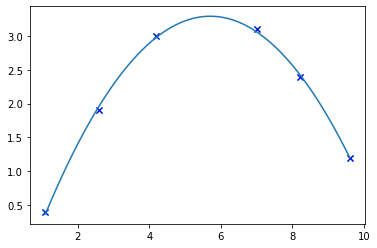

In [45]:
import matplotlib.pyplot as plt
plt.plot(pnts[:,0], pnts[:,1], 'bx')                    # adott pontok
plt.scatter(pnts[:,0], pnts[:,1], marker='x')           # azonos az előzővel
x = np.linspace(np.min(pnts[:,0]), np.max(pnts[:,0]), 100)
_ = plt.plot(x, np.polyval(c, x))                       # függvény görbe

### Magasság ihálózat kiegyenlítés

Készítsünk egy szintezési hálózat kiegyenlítésére alkalmas programot. Két bemenő állománnyal dolgozunk. Az egyikben a pontok magassága, a másikban a szintetési vonalak adatai (kezdő sorszám, záró sorszám, magasságkülönbség, hossz) találhatók. Program szabad magassági hálózat kiegyenlítést számít.

Az egyszerűség kedvéért a pontszámoknak nullától kezdődő sorszámoknak kell lenniük és mindig szabad magassági hálózat kiegyenlítés történik.

Két adatfájlt használunk, az elev.txt tartalmazza a magasságokat, az obs.txt a mérési vonalakat tartalmazza soronként kezdőpont, végpont, magasságkülönbség, hossz sorrendben.

In [48]:
!wget -q -O sample_data/elev.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/python/code/elev.txt
!wget -q -O sample_data/obs.txt https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/python/code/obs.txt
!cat sample_data/elev.txt
!cat sample_data/obs.txt

104.234
103.487
102.958
101.345
0 1 -0.749 1.1
0 2 -1.274 1.8
0 3 -2.890 1.4
1 2 -0.530 1.5
1 3 -2.141 1.9
2 3 -1.614 0.9 


In [62]:
elev = np.genfromtxt('sample_data/elev.txt', delimiter=' ')
obs = np.genfromtxt('sample_data/obs.txt', delimiter=' ')

mkm = 0.7                       # 0.7 mm/km a priori középhiba
n = elev.size                   # ismeretlenek száma
m = obs.shape[0]                # egyenletek száma
A = np.zeros((m, n))            # alakmátrix
P = np.zeros((m, m))            # súlymátrix
P[(np.arange(m), np.arange(m))] = 1 / (obs[:, -1] * mkm)**2
A[(np.arange(m), obs[:,0].astype(int))] = -1
A[(np.arange(m), obs[:,1].astype(int))] = 1
l = obs[:,-2] - A.dot(elev)     # tisztatagok
Ninv = np.linalg.pinv(A.T.dot(P).dot(A))
x = Ninv.dot(A.T).dot(P).dot(l) # magasság változások
v = A.dot(x) - l                # javítások
X = elev + x                    # kiegyenlített magasságok
print('kiegyenlített magasságok:')
np.set_printoptions(precision=3)
print(X)

kiegyenlített magasságok:
[104.235 103.486 102.958 101.345]
